In [18]:
import numpy as np
import pandas as pd
from datetime import datetime
import calendar
import matplotlib.pyplot as plt
%matplotlib inline

### Read data

In [2]:
data = {
    'av': pd.read_csv('data/air_visit_data.csv'),
    'as': pd.read_csv('data/air_store_info.csv'),
    'hs': pd.read_csv('data/hpg_store_info.csv'),
    'ar': pd.read_csv('data/air_reserve.csv'),
    'hr': pd.read_csv('data/hpg_reserve.csv'),
    'sr': pd.read_csv('data/store_id_relation.csv'),
    'ss': pd.read_csv('data/sample_submission.csv'),
    'di': pd.read_csv('data/date_info.csv', parse_dates=True).rename(columns={'calendar_date':'visit_date'})
    }

### Prepare date_info

In [3]:
data['di'].head()

,visit_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [4]:
data['di']['visit_date'] = pd.to_datetime(data['di']['visit_date'])
#data['di'].set_index(['visit_date'], inplace=True)
#data['di'].index.name = None
data['di'].day_of_week = data['di'].day_of_week.apply(list(calendar.day_name).index)
data['di'].head()

,visit_date,day_of_week,holiday_flg
0,2016-01-01,4,1
1,2016-01-02,5,1
2,2016-01-03,6,1
3,2016-01-04,0,0
4,2016-01-05,1,0


### Prepare air_visit_data

In [5]:
data['av'].head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [6]:
data['av']['visit_date'] = pd.to_datetime(data['av']['visit_date'])
data['av'] = pd.merge(data['av'], data['di'], how='left', on=['visit_date'])
data['av'].head()

,air_store_id,visit_date,visitors,day_of_week,holiday_flg
0,air_ba937bf13d40fb24,2016-01-13,25,2,0
1,air_ba937bf13d40fb24,2016-01-14,32,3,0
2,air_ba937bf13d40fb24,2016-01-15,29,4,0
3,air_ba937bf13d40fb24,2016-01-16,22,5,0
4,air_ba937bf13d40fb24,2016-01-18,6,0,0


In [7]:
data['av']['day_of_week'] = data['av'].apply(lambda row: 7 if row['holiday_flg'] == 1 else row['day_of_week'], axis=1)
data['av'].drop(['holiday_flg'], axis=1, inplace=True)
data['av'].head()

,air_store_id,visit_date,visitors,day_of_week
0,air_ba937bf13d40fb24,2016-01-13,25,2
1,air_ba937bf13d40fb24,2016-01-14,32,3
2,air_ba937bf13d40fb24,2016-01-15,29,4
3,air_ba937bf13d40fb24,2016-01-16,22,5
4,air_ba937bf13d40fb24,2016-01-18,6,0


### Prepare submission data

In [8]:
data['ss'].head()

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,0


In [9]:
data['ss']['store_id'] = data['ss'].apply(lambda row: row.loc['id'][:row.loc['id'].rindex('_')], axis=1)
data['ss']['visit_date'] = data['ss'].apply(lambda row: row.loc['id'][row.loc['id'].rindex('_')+1:], axis=1)
data['ss']['visit_date'] = pd.to_datetime(data['ss']['visit_date'])
data['ss'].head()

,id,visitors,store_id,visit_date
0,air_00a91d42b08b08d9_2017-04-23,0,air_00a91d42b08b08d9,2017-04-23
1,air_00a91d42b08b08d9_2017-04-24,0,air_00a91d42b08b08d9,2017-04-24
2,air_00a91d42b08b08d9_2017-04-25,0,air_00a91d42b08b08d9,2017-04-25
3,air_00a91d42b08b08d9_2017-04-26,0,air_00a91d42b08b08d9,2017-04-26
4,air_00a91d42b08b08d9_2017-04-27,0,air_00a91d42b08b08d9,2017-04-27


In [10]:
data['ss'] = pd.merge(data['ss'], data['di'], how='left', on=['visit_date'])
data['ss'].head()

,id,visitors,store_id,visit_date,day_of_week,holiday_flg
0,air_00a91d42b08b08d9_2017-04-23,0,air_00a91d42b08b08d9,2017-04-23,6,0
1,air_00a91d42b08b08d9_2017-04-24,0,air_00a91d42b08b08d9,2017-04-24,0,0
2,air_00a91d42b08b08d9_2017-04-25,0,air_00a91d42b08b08d9,2017-04-25,1,0
3,air_00a91d42b08b08d9_2017-04-26,0,air_00a91d42b08b08d9,2017-04-26,2,0
4,air_00a91d42b08b08d9_2017-04-27,0,air_00a91d42b08b08d9,2017-04-27,3,0


In [11]:
data['ss']['day_of_week'] = data['ss'].apply(lambda row: 7 if row['holiday_flg'] == 1 else row['day_of_week'], axis=1)
data['ss'].drop(['holiday_flg'], axis=1, inplace=True)
data['ss'].head()

,id,visitors,store_id,visit_date,day_of_week
0,air_00a91d42b08b08d9_2017-04-23,0,air_00a91d42b08b08d9,2017-04-23,6
1,air_00a91d42b08b08d9_2017-04-24,0,air_00a91d42b08b08d9,2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,0,air_00a91d42b08b08d9,2017-04-25,1
3,air_00a91d42b08b08d9_2017-04-26,0,air_00a91d42b08b08d9,2017-04-26,2
4,air_00a91d42b08b08d9_2017-04-27,0,air_00a91d42b08b08d9,2017-04-27,3


In [38]:
def visualize():
    ts_train = data['av'].groupby(['visit_date'])[['visitors']].sum()
    ts_pred = data['ss'].groupby(['visit_date'])[['visitors']].sum()
    plt.rcParams["figure.figsize"] = (16,4)
    plt.plot(ts_train)
    plt.plot(ts_pred)
    plt.show()

    ts_train = data['av'][:391][['visit_date', 'visitors']].set_index('visit_date')
    ts_pred = data['ss'][23361:23399][['visit_date', 'visitors']].set_index('visit_date')
    plt.plot(ts_train)
    plt.plot(ts_pred)
    plt.show()

### Prediction based on median for all days

In [13]:
medians = data['av'].groupby('air_store_id').median()
medians_by_days = data['av'].groupby(['air_store_id', 'day_of_week']).median()
general_median = medians['visitors'].median()
medians_by_days[:10][:]

visitors
air_store_id         day_of_week          
air_00a91d42b08b08d9 0                19.0
                     1                24.5
                     2                28.0
                     3                30.0
                     4                35.5
                     5                11.0
                     6                 2.0
                     7                21.0
air_0164b9927d20bcc3 0                 6.0
                     1                 8.0

In [14]:
def predict_by_median(row):
    store_id = row.loc['store_id']
    row.loc['visitors'] = medians.loc[store_id]['visitors'] if store_id in medians.index else general_median
    return row

In [15]:
data['ss'] = data['ss'].apply(predict_by_median, axis=1)

In [16]:
data['ss'].head()

,id,visitors,store_id,visit_date,day_of_week
0,air_00a91d42b08b08d9_2017-04-23,26.0,air_00a91d42b08b08d9,2017-04-23,6
1,air_00a91d42b08b08d9_2017-04-24,26.0,air_00a91d42b08b08d9,2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,26.0,air_00a91d42b08b08d9,2017-04-25,1
3,air_00a91d42b08b08d9_2017-04-26,26.0,air_00a91d42b08b08d9,2017-04-26,2
4,air_00a91d42b08b08d9_2017-04-27,26.0,air_00a91d42b08b08d9,2017-04-27,3


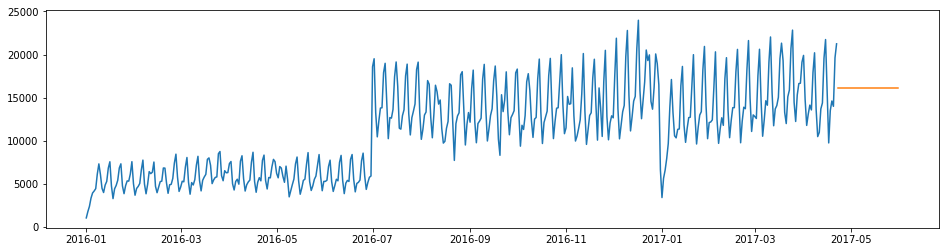

In [19]:
visualize()

In [ ]:
data['ss'].to_csv('data/prediction_median.csv', index=False, columns=['id', 'visitors'])

### Prediction based on median for particular day of week (with festivals as 8th day)

In [33]:
medians_by_days = data['av'].groupby(['air_store_id', 'day_of_week']).median()
general_median_for_day = data['av'].groupby('day_of_week').median()
medians_by_days[:10][:]

visitors
air_store_id         day_of_week          
air_00a91d42b08b08d9 0                19.0
                     1                24.5
                     2                28.0
                     3                30.0
                     4                35.5
                     5                11.0
                     6                 2.0
                     7                21.0
air_0164b9927d20bcc3 0                 6.0
                     1                 8.0

In [34]:
def predict_by_median_for_concrete_day(row):
    store_id = row.loc['store_id']
    day_of_week = row.loc['day_of_week']
    if store_id in medians_by_days.index:
        if day_of_week in medians_by_days.loc[store_id].index:
            row.loc['visitors'] = medians_by_days.loc[store_id, day_of_week]['visitors']
        else:
            row.loc['visitors'] = medians_by_days.loc[store_id].values.mean()
    else:
        row.loc['visitors'] = general_median_for_day.loc[day_of_week]['visitors']
        
    return row

In [35]:
data['ss'] = data['ss'].apply(predict_by_median_for_concrete_day, axis=1)

In [36]:
data['ss'].head()

,id,visitors,store_id,visit_date,day_of_week
0,air_00a91d42b08b08d9_2017-04-23,2.0,air_00a91d42b08b08d9,2017-04-23,6
1,air_00a91d42b08b08d9_2017-04-24,19.0,air_00a91d42b08b08d9,2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,24.5,air_00a91d42b08b08d9,2017-04-25,1
3,air_00a91d42b08b08d9_2017-04-26,28.0,air_00a91d42b08b08d9,2017-04-26,2
4,air_00a91d42b08b08d9_2017-04-27,30.0,air_00a91d42b08b08d9,2017-04-27,3


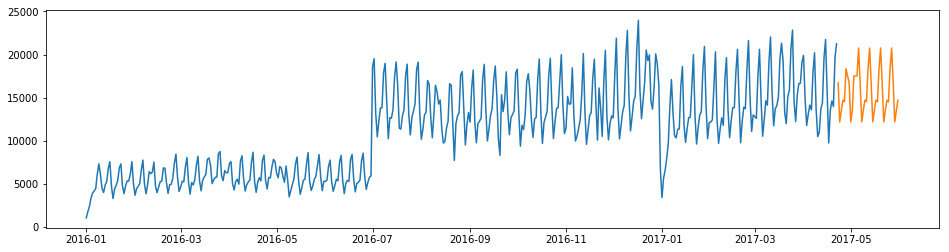

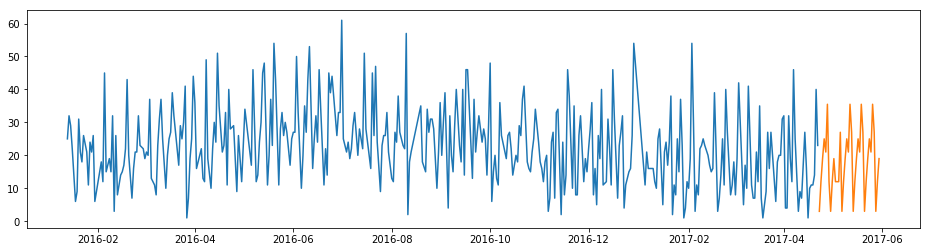

In [39]:
visualize()

In [ ]:
data['ss'].to_csv('data/prediction_median_for_concrete_day.csv', index=False, columns=['id', 'visitors'])

### Prediction based on proportinal dependency for particular day of week (with festivals as 8th day)

In [40]:
groupby_store_day = data['av'].groupby(['air_store_id', 'day_of_week'])
groupby_store = data['av'].groupby(['air_store_id'])

In [41]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return np.median(result)

In [42]:
pred_values_dict = {}
def predict_by_proportional_for_concrete_day2(row):
    store_id = row.loc['store_id']
    day_of_week = row.loc['day_of_week']
    key = (store_id, day_of_week)
    if key not in pred_values_dict:
        pred_values_dict[key] = []
    pred_values = pred_values_dict[key]     
    if (store_id, day_of_week) in groupby_store_day.groups.keys():
        train_values = groupby_store_day.get_group((store_id, day_of_week))['visitors'].values
    else:
        train_values = groupby_store.get_group(store_id)['visitors'].values
    
    values = np.hstack((train_values, pred_values))
    pred = exponential_smoothing(values[::-1], 0.25)        
    pred_values_dict[key].append(pred)
    row.loc['visitors'] = pred
    return row

In [43]:
data['ss'] = data['ss'].apply(predict_by_proportional_for_concrete_day2, axis=1)

In [44]:
data['ss'].head()

,id,visitors,store_id,visit_date,day_of_week
0,air_00a91d42b08b08d9_2017-04-23,2.000000,air_00a91d42b08b08d9,2017-04-23,6
1,air_00a91d42b08b08d9_2017-04-24,22.298746,air_00a91d42b08b08d9,2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,22.470664,air_00a91d42b08b08d9,2017-04-25,1
3,air_00a91d42b08b08d9_2017-04-26,27.759971,air_00a91d42b08b08d9,2017-04-26,2
4,air_00a91d42b08b08d9_2017-04-27,30.703244,air_00a91d42b08b08d9,2017-04-27,3


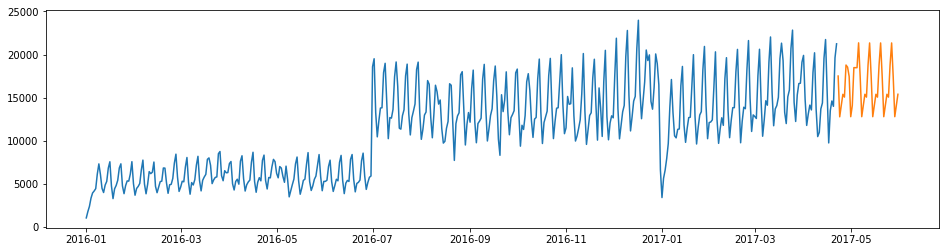

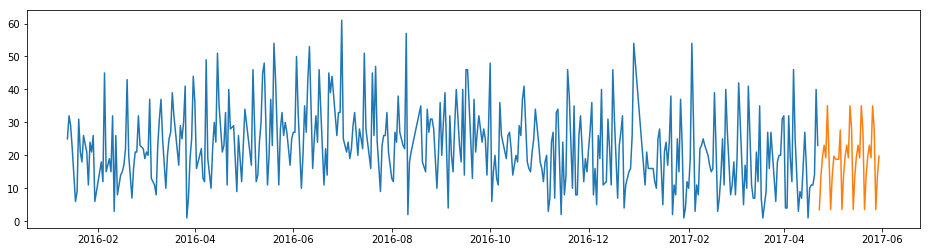

In [45]:
visualize()

In [60]:
data['ss'].to_csv('data/prediction_proportional_025_for_concrete_day.csv', index=False, columns=['id', 'visitors'])

### Experiments

In [ ]:
data['av'].groupby(['air_store_id', 'day_of_week']).groups

In [ ]:
for name,group in data['av'].groupby(['air_store_id', 'day_of_week']):
    print name
    print group

In [ ]:
data['av'].groupby(['air_store_id', 'day_of_week']).get_group(('air_ba937bf13d40fb24', 7))['visitors'].values

In [ ]:
data['av'].groupby(['air_store_id', 'day_of_week']).last().loc['air_ba937bf13d40fb24', 7]

In [ ]:
df_day = data['av'].groupby(['air_store_id', 'day_of_week']).get_group(('air_ba937bf13d40fb24', 0))[['visit_date', 'visitors']]
df_day.set_index(['visit_date'], inplace=True)
df_day.index.name = None
df_day.head()

In [ ]:
df_day.plot( figsize=(16,4))

In [ ]:
df_all = data['av'].groupby(['air_store_id']).get_group('air_ba937bf13d40fb24')[['visit_date', 'visitors']]
df_all.set_index(['visit_date'], inplace=True)
df_all.index.name = None
df_all.head()

In [ ]:
df_all.plot( figsize=(16,4))

### Prepare air_reserve

In [ ]:
data['ar']['visit_datetime'] = pd.to_datetime(data['ar']['visit_datetime'])
data['ar']['visit_date'] = pd.to_datetime(data['ar']['visit_datetime'].dt.date)
data['ar']['reserve_datetime'] = pd.to_datetime(data['ar']['reserve_datetime'])
data['ar']['reserve_date'] = pd.to_datetime(data['ar']['reserve_datetime'].dt.date)
data['ar']['reserve_delta'] = (data['ar']['visit_datetime']-data['ar']['reserve_datetime']).astype('timedelta64[h]')
data['ar'].drop(['visit_datetime', 'reserve_datetime'], inplace=True, axis=1)
data['ar'].head()

In [ ]:
len(data['ar']['air_store_id'].unique())

In [ ]:
air_reservations_by_dates = data['ar'].groupby(['air_store_id', 'visit_date'])[['reserve_visitors']].sum()
air_reservations_by_dates.head()

### Prepare hpg_reserve

In [ ]:
data['hr']['visit_datetime'] = pd.to_datetime(data['hr']['visit_datetime'])
data['hr']['visit_date'] = pd.to_datetime(data['hr']['visit_datetime'].dt.date)
data['hr']['reserve_datetime'] = pd.to_datetime(data['hr']['reserve_datetime'])
data['hr']['reserve_date'] = pd.to_datetime(data['hr']['reserve_datetime'].dt.date)
data['hr']['reserve_delta'] = (data['hr']['visit_datetime']-data['hr']['reserve_datetime']).astype('timedelta64[h]')
data['hr'].drop(['visit_datetime', 'reserve_datetime'], inplace=True, axis=1)
data['hr'].head()

In [ ]:
hpg_reservations_by_dates = data['hr'].groupby(['hpg_store_id', 'visit_date'])[['reserve_visitors']].sum()
hpg_reservations_by_dates.head()

In [ ]:
len(data['hr']['hpg_store_id'].unique())